# 91

In [1]:
# 런타임 20초 소요
!pip install transformers

# 위키피디아 설치
!pip install wikipedia
import wikipedia

# 키워드 설정
keyword = "Moderna"
# 위키피디아 언어 설정
wikipedia.set_lang("en")

# 키워드 검색 및 출력
search_response = wikipedia.search(keyword)
print(search_response)

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=d9eb3384891988122cb3712ed03024dba153fa8a609a742b3a27bff10d424921
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia
['Moderna', 'Moderna COVID-19 vaccine', 'Studio Moderna', 'Devotio Moderna', 'Moderna Museet', 'T-72', 'Moderna tider', 'La Moderna', 'Modern Art Week', 'Moderna Museet Malmö']


#92

In [2]:
search_response

['Moderna',
 'Moderna COVID-19 vaccine',
 'Studio Moderna',
 'Devotio Moderna',
 'Moderna Museet',
 'T-72',
 'Moderna tider',
 'La Moderna',
 'Modern Art Week',
 'Moderna Museet Malmö']

In [3]:
# search_response에 담긴 세번째 원소(인덱스 2에 해당하는 원소) 출력
search_response[2]

'Studio Moderna'

In [4]:
# search_response의 세번째 원소를 키워드로 위키피디아 검색
moderna_text_t = wikipedia.page(search_response[2])
type(moderna_text_t)

wikipedia.wikipedia.WikipediaPage

In [5]:
# 추가 코딩. moderna_text 출력
moderna_text_t

<WikipediaPage 'Studio Moderna'>

In [6]:
# search_response 두번째 요소를 키워드로 위키피디아 검색 및 본문(content) 출력
moderna_text = wikipedia.page(search_response[2]).content
moderna_text

'Studio Moderna Group is an omnichannel, multi-brand and direct-to-consumer retailer, primarily operating across Central and Eastern Europe.\nIn 2011, Studio Moderna launched Octaspring technology. and sold the first Dormeo mattress featuring Octaspring springs.\n\n\n== References ==\n\n\n== External links ==\nStudio Moderna'

# 93

In [7]:
# 코딩 해석은 문제 91과 92 참조
keyword = "PFizer"

wikipedia.set_lang("en")
search_response = wikipedia.search(keyword)
print(search_response)

pfizer_text = wikipedia.page(search_response[1]).content


['Pfizer', 'Pfizer–BioNTech COVID-19 vaccine', 'Nirmatrelvir/ritonavir', 'Pfizer (disambiguation)', 'Albert Bourla', 'Charles Pfizer', 'Sildenafil', 'Abdullahi v. Pfizer, Inc.', 'Zoetis', 'Gustav Pfizer']


# 94

In [8]:
# 문제 91의 트랜스포머스 라이브러리 미설치 시 재설치
!pip install transformers

# 95

In [9]:
from transformers import pipeline, AutoTokenizer

# 파이프라인 설정
get_feature = pipeline('feature-extraction', model='bert-base-uncased', tokenizer='bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


#96

In [10]:
sample_word = "vaccine"
# sample_word를 파이프라인을 인스턴스화한 get_feature에 투입
hidden_state = get_feature(sample_word)

import numpy as np
# hidden_state를 넘파이로 변경 후 차원 확인
np.array(hidden_state).shape

(1, 3, 768)

# 97

In [11]:
# 토크나이저 불러오기
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# sample_word를 토크나이징한 결과의 input_ids를 디코딩
print(tokenizer.decode(tokenizer(sample_word)['input_ids']))

[CLS] vaccine [SEP]


# 98

In [12]:
# get_cls_vector 함수 정의
def get_cls_vector(sample_text):

  hidden_state = get_feature(sample_text, padding=True, truncation=True, max_length=512)

  # hidden_state를 넘파이 어레이 타입으로 바꾸고 첫번째 행의 첫번째 열 요소를 변수 cls_vec에 저장
  cls_vec = np.array(hidden_state)[0, 0]
  return cls_vec

# 입력 텍스트 줄이 바뀔 때마다 분리 후 저장
ml = moderna_text.split("\n")
pfzl = pfizer_text.split("\n")

# 입력 텍스트 중에 공백은 제거
ml = [text for text in ml if text != '']
pfzl = [text for text in pfzl if text != '']

In [22]:
from pprint import pprint

pprint(ml)
print("길이:", len(ml))

['Studio Moderna Group is an omnichannel, multi-brand and direct-to-consumer '
 'retailer, primarily operating across Central and Eastern Europe.',
 'In 2011, Studio Moderna launched Octaspring technology. and sold the first '
 'Dormeo mattress featuring Octaspring springs.',
 '== References ==',
 '== External links ==',
 'Studio Moderna']
길이: 5


In [23]:
print(ml)

['Studio Moderna Group is an omnichannel, multi-brand and direct-to-consumer retailer, primarily operating across Central and Eastern Europe.', 'In 2011, Studio Moderna launched Octaspring technology. and sold the first Dormeo mattress featuring Octaspring springs.', '== References ==', '== External links ==', 'Studio Moderna']


#99

In [14]:
# 런타임 50초 소요
# ml 및 pfzl에 담긴 텍스트를 get_cls_vector 함수에 입력 후 그 결과를 넘파이 어레이로 변환
moderna_vecs = np.array([get_cls_vector(text) for text in ml])
pfizer_vecs = np.array([get_cls_vector(text) for text in pfzl])

# moderna_vecs 및 pfizer_vecs 차원 확인
print(moderna_vecs.shape)
print(pfizer_vecs.shape)
print(moderna_vecs)
print(pfizer_vecs)

(5, 768)
(187, 768)
[[-0.15606597 -0.02395933 -0.26544711 ...  0.06979205  0.31740278
   0.31499982]
 [-0.38707533 -0.25292012  0.44876623 ... -0.09791295 -0.37897146
   0.1479764 ]
 [ 0.04974609  0.36285567  0.08282076 ... -0.50521076  0.14155108
   0.66715801]
 [-0.0180288   0.17804486  0.23818508 ... -0.39876702  0.07389203
   0.59626329]
 [-0.08480237  0.0126066  -0.20787139 ... -0.25833029 -0.01996072
   0.52910256]]
[[-0.69130355 -0.23726501 -0.14853485 ...  0.58211243 -0.02219823
   0.74895447]
 [-0.34252051 -0.57788688 -0.43719295 ... -0.05995627  0.04669094
   0.63602352]
 [-0.72713357 -0.41647637 -0.15401056 ... -0.03001192 -0.15230432
   0.67100489]
 ...
 [-0.32647166 -0.14446752  0.01402577 ... -0.42939982  0.02647073
   0.56728894]
 [-0.38935772 -0.30235234  0.23459281 ... -0.75547826  0.10869559
   0.48532933]
 [-0.55181324 -0.39523008 -0.4840714  ... -0.50117069 -0.50062495
   0.43064752]]


#100

In [24]:
# 빈 컨테이너 딕셔너리 생성
pfizer_dics = {}

# for 반복문 중첩을 pfzl에 적용
for text in pfzl:
  # text를 토크나이징한 결과 단어를 하나씩 for 반복 루프 실행
  for token in tokenizer.tokenize(text):

    # token 길이가 5보다 크면 아래 구문 실행
    if len(token) > 5:
      # pfizer_dicsd의 키(key)에 token이 없는 경우
      if token not in pfizer_dics:
        # pfizer_dics 딕셔너리에 키(key)를 token으로, 키값(value)을 1로 설정
        pfizer_dics[token] = 1

      # pfizer_dicsd의 키(key)에 token이 있는 경우
      else:
        # pfizer_dics 딕셔너리에 키(key)를 token으로, 키값(value)은 기존 값에 1을 더함
        pfizer_dics[token] += 1
        # for 반복문 종료

# pfizer_dics.items()는 pfizer_dics 딕셔너리에 담긴 키와 키값을 출력
# sorted(pfizer_dics.items(), key=lambda x:-x[1])은 pfizer_dics.items의 두번째 원소인 값 기준으로 내림차순 정렬
# 마지막에 덧붙인 [:30]은 결과물의 첫 30개를 출력
sorted(pfizer_dics.items(), key=lambda x:-x[1])[:30]

[('vaccine', 173),
 ('against', 35),
 ('##valent', 29),
 ('million', 29),
 ('united', 26),
 ('people', 26),
 ('booster', 26),
 ('disease', 24),
 ('authorization', 23),
 ('authorized', 22),
 ('company', 21),
 ('european', 21),
 ('states', 20),
 ('effectiveness', 19),
 ('vaccines', 19),
 ('trials', 18),
 ('months', 18),
 ('second', 18),
 ('health', 18),
 ('clinical', 17),
 ('development', 16),
 ('emergency', 16),
 ('approved', 16),
 ('agency', 16),
 ('safety', 15),
 ('december', 15),
 ('##nation', 15),
 ('medicines', 15),
 ('variant', 14),
 ('september', 13)]

In [25]:
# 빈 컨테이너 딕셔너리 생성
ml_dics = {}

# for 반복문 중첩을 ml에 적용
# 이하 코딩 해설은 바로 위 코딩 블록 참조
for text in ml:
  for token in tokenizer.tokenize(text):
    if len(token) > 5:
      if token not in ml_dics:
        ml_dics[token] = 1
      else:
        ml_dics[token] += 1
sorted(ml_dics.items(), key=lambda x:-x[1])[:30]


[('studio', 3),
 ('modern', 3),
 ('direct', 1),
 ('consumer', 1),
 ('retailer', 1),
 ('primarily', 1),
 ('operating', 1),
 ('across', 1),
 ('central', 1),
 ('eastern', 1),
 ('europe', 1),
 ('launched', 1),
 ('technology', 1),
 ('mattress', 1),
 ('featuring', 1),
 ('springs', 1),
 ('references', 1),
 ('external', 1)]

#101

TSNE에서 perplexity는 데이터의 밀도를 추정하는 파라미터로, TSNE가 군집을 형성하는 방식에 영향을 주는 중요한 하이퍼파라미터다.
perplexity 값을 조정하면 데이터의 분포와 군집의 형태가 달라질 수 있다.

- perplexity의 의미
  - 이 값이 작으면 지역적(로컬) 구조에 집중.
  - 이 값이 크면 전역적(글로벌) 구조에 집중.
  - 데이터 밀도: perplexity는 TSNE가 데이터 밀도를 계산할 때 사용하는 기준으로, 데이터 포인트들이 몇 개의 "이웃"과 가까운지를 결정하는 역할을 한다. perplexity가 크면 더 많은 데이터를 이웃으로 간주하고, 작으면 적은 데이터를 이웃으로 간주한다.

  - 군집의 형태: perplexity 값이 작을수록 TSNE는 지역적인 군집에 집중하며, 서로 인접한 데이터들만 밀접하게 배치하려고 한다. 반면 perplexity 값이 크면 더 넓은 범위의 데이터를 고려하여 큰 규모의 군집을 형성하려고 한다.

  - 시각적 차이 해석:
    - 첫 번째 그림 (perplexity=4): perplexity 값이 조금 더 크기 때문에, TSNE가 더 넓은 범위의 이웃 데이터를 고려하여 좀 더 완만한 군집 구조를 형성하려고 한다. 따라서 점들이 더 분산되어 배치되는 경향이 있습니다.

    - 두 번째 그림 (perplexity=2): perplexity 값이 작기 때문에, TSNE가 매우 인접한 이웃 관계에 집중하여 군집을 형성한다. 그 결과 각 데이터가 주변의 데이터와 매우 강하게 결합되어 군집의 분리도가 뚜렷해지고, 일부 점이 특정 위치에 강하게 모이는 경향을 보인다.

- perplexity 값 선택 가이드
  - 작은 데이터셋 (예: 수십 개에서 백 개 이하): 5에서 30 사이의 perplexity가 보통 적합. 작은 값일수록 더 지역적인 군집 구조가 강조.
  - 중간 크기 데이터셋 (예: 백 개에서 천 개 정도): perplexity=30을 기본값으로 사용하거나, 20에서 50 사이의 값을 시도해 볼 수 있다.
  - 큰 데이터셋 (예: 천 개 이상): 30 이상의 perplexity 값이 더 전역적인 구조를 표현하는 데 유리할 수 있다. perplexity=50이나 perplexity=100 등을 시도할 수 있다.

In [30]:
print("moderna_vecs의 샘플 수:", len(moderna_vecs))

moderna_vecs의 샘플 수: 5


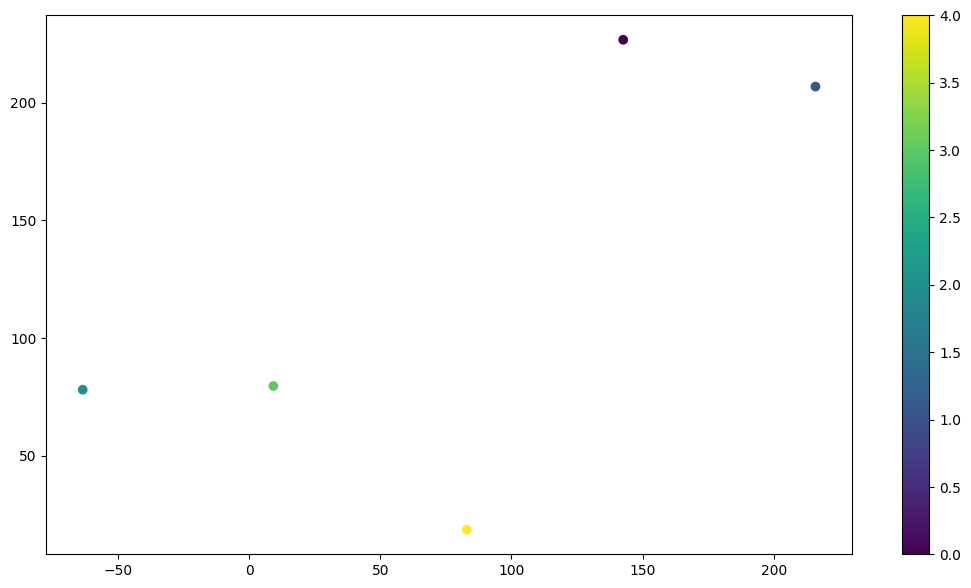

In [38]:
# TSNE 파라미터 설정 - 샘플 수보다 작은 perplexity 값 사용
# tsne = TSNE(n_components=2, random_state=0)
tsne = TSNE(n_components=2, random_state=0, perplexity=2)

# TSNE에 moderna_vecs 투입 후 적용
moderna_vecs_reduced = tsne.fit_transform(moderna_vecs)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 7))
plt.scatter(moderna_vecs_reduced[:, 0], moderna_vecs_reduced[:, 1], c=[i for i in range(len(ml))])
plt.colorbar()
plt.show()

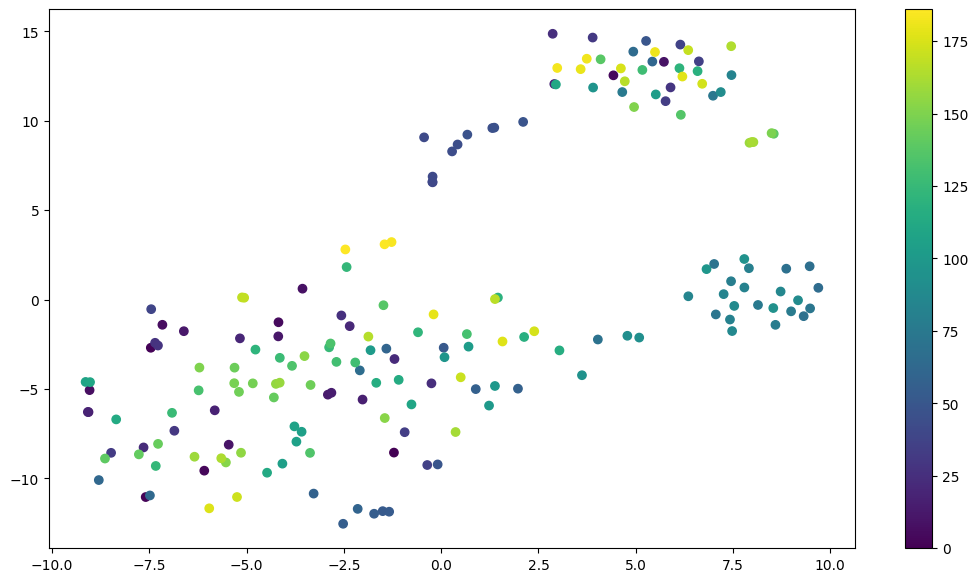

In [27]:
# 이하 코딩 주석은 pfizer_vecs 투입을 제외하고는 위 코딩 블록과 동일
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

# TSNS에 pfizer_vecs 투입 후 적용(fit_transform)
pfizer_vecs_reduced = tsne.fit_transform(pfizer_vecs)

import matplotlib.pyplot as plt

plt.figure(figsize=(13, 7))
plt.scatter(pfizer_vecs_reduced[:, 0], pfizer_vecs_reduced[:, 1], c=[i for i in range(len(pfzl))])
plt.colorbar()
plt.show();

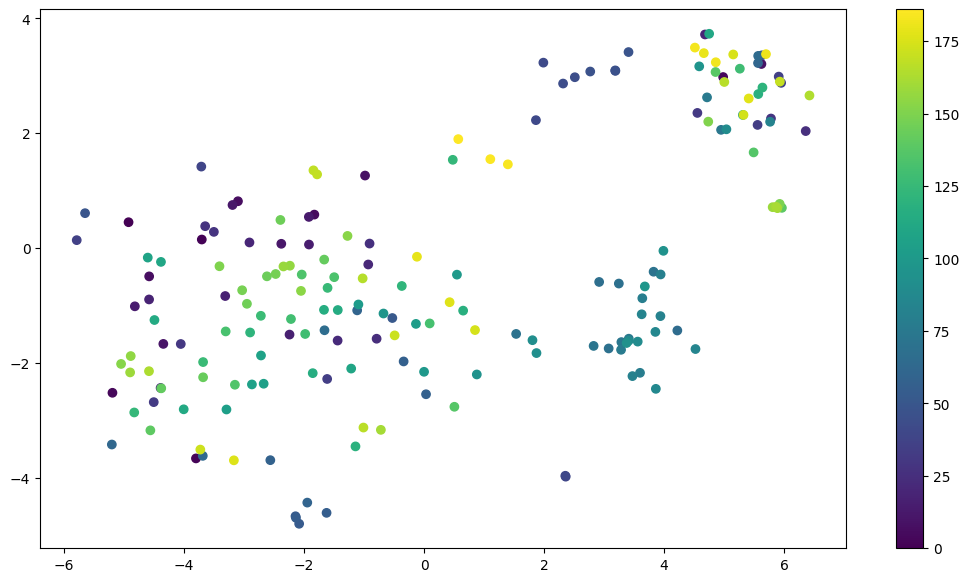

In [39]:
# 이하 코딩 주석은 pfizer_vecs 투입을 제외하고는 위 코딩 블록과 동일
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, perplexity=60)

# TSNS에 pfizer_vecs 투입 후 적용(fit_transform)
pfizer_vecs_reduced = tsne.fit_transform(pfizer_vecs)

import matplotlib.pyplot as plt

plt.figure(figsize=(13, 7))
plt.scatter(pfizer_vecs_reduced[:, 0], pfizer_vecs_reduced[:, 1], c=[i for i in range(len(pfzl))])
plt.colorbar()
plt.show();